In [8]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import torch
import torch.nn as nn
import torch.optim as optim

from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler

In [ ]:
# chargement du dataset
# Ajout de commentaire testgit

data = pd.read_csv('data/diamonds.csv')
data.head(5)

Unnamed: 0  carat      cut color clarity  depth  table  price     x     y  \
0           1   0.23    Ideal     E     SI2   61.5   55.0    326  3.95  3.98   
1           2   0.21  Premium     E     SI1   59.8   61.0    326  3.89  3.84   
2           3   0.23     Good     E     VS1   56.9   65.0    327  4.05  4.07   
3           4   0.29  Premium     I     VS2   62.4   58.0    334  4.20  4.23   
4           5   0.31     Good     J     SI2   63.3   58.0    335  4.34  4.35   

      z  
0  2.43  
1  2.31  
2  2.31  
3  2.63  
4  2.75

# ANALYSE DU DATASET

## carat : Poids du diamant (en carats).
## cut : Qualité de la taille du diamant (Fair, Good, Very Good, Premium, Ideal).
## color : Couleur du diamant, de J (la pire) à D (la meilleure).
## clarity : Mesure de la clarté d'un diamant (I1, SI2, SI1, VS2, VS1, VVS2, VVS1, IF).
## depth : Profondeur totale en pourcentage = z / moyenne(x, y) = 2 * z / (x + y).
## table : Largeur du sommet du diamant par rapport à la largeur des points les plus larges.
## price : Prix en dollars américains.
## x : Longueur en mm.
## y : Largeur en mm.
## z : Profondeur en mm.

In [5]:
data.dtypes

Unnamed: 0      int64
carat         float64
cut            object
color          object
clarity        object
depth         float64
table         float64
price           int64
x             float64
y             float64
z             float64
dtype: object

In [6]:
data.columns

Index(['Unnamed: 0', 'carat', 'cut', 'color', 'clarity', 'depth', 'table',
       'price', 'x', 'y', 'z'],
      dtype='object')

In [3]:
#Compte des lignes dupliquées et non dupliquées
data.duplicated().value_counts()

False    53940
Name: count, dtype: int64

In [4]:
data.isna().sum()

Unnamed: 0    0
carat         0
cut           0
color         0
clarity       0
depth         0
table         0
price         0
x             0
y             0
z             0
dtype: int64

# Supprimons la colonne Unnamed

In [9]:
data.drop('Unnamed: 0', axis=1, inplace=True)

# Matrice de correlaton

<Axes: >

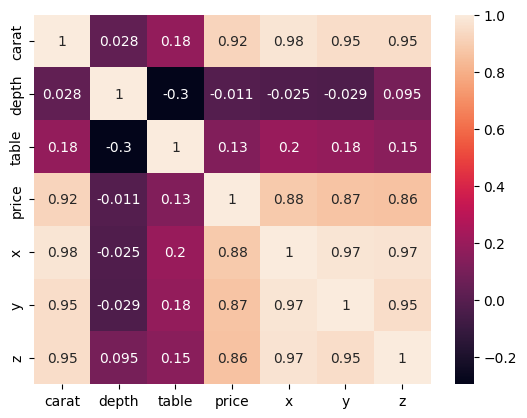

In [10]:
cat_col = ['cut','color','clarity']
df = data.drop(cat_col,axis=1)
sns.heatmap(df.corr(),annot=True)

In [11]:
data.columns

Index(['carat', 'cut', 'color', 'clarity', 'depth', 'table', 'price', 'x', 'y',
       'z'],
      dtype='object')

In [5]:
data.head(5)

Unnamed: 0  carat      cut color clarity  depth  table  price     x     y  \
0           1   0.23    Ideal     E     SI2   61.5   55.0    326  3.95  3.98   
1           2   0.21  Premium     E     SI1   59.8   61.0    326  3.89  3.84   
2           3   0.23     Good     E     VS1   56.9   65.0    327  4.05  4.07   
3           4   0.29  Premium     I     VS2   62.4   58.0    334  4.20  4.23   
4           5   0.31     Good     J     SI2   63.3   58.0    335  4.34  4.35   

      z  
0  2.43  
1  2.31  
2  2.31  
3  2.63  
4  2.75

## Type de donnees

In [13]:
data.dtypes

carat      float64
cut         object
color       object
clarity     object
depth      float64
table      float64
price        int64
x          float64
y          float64
z          float64
dtype: object

# Convertion

In [14]:
data['table'] = data['table'].astype('int')

# Encodage des colonnes categorielles 

In [15]:
fe = data.groupby('color').size()/len(data)
data.loc[:,'Color']=data.color.map(fe)
data.drop('color',axis=1,inplace=True)

In [16]:
fe = data.groupby('clarity').size()/len(data)
data.loc[:,'Clarity']=data.clarity.map(fe)
data.drop('clarity',axis=1,inplace=True)

In [10]:
data.head(10)

Unnamed: 0  carat        cut color clarity  depth  table  price     x  \
0           1   0.23      Ideal     E     SI2   61.5   55.0    326  3.95   
1           2   0.21    Premium     E     SI1   59.8   61.0    326  3.89   
2           3   0.23       Good     E     VS1   56.9   65.0    327  4.05   
3           4   0.29    Premium     I     VS2   62.4   58.0    334  4.20   
4           5   0.31       Good     J     SI2   63.3   58.0    335  4.34   
5           6   0.24  Very Good     J    VVS2   62.8   57.0    336  3.94   
6           7   0.24  Very Good     I    VVS1   62.3   57.0    336  3.95   
7           8   0.26  Very Good     H     SI1   61.9   55.0    337  4.07   
8           9   0.22       Fair     E     VS2   65.1   61.0    337  3.87   
9          10   0.23  Very Good     H     VS1   59.4   61.0    338  4.00   

      y     z  
0  3.98  2.43  
1  3.84  2.31  
2  4.07  2.31  
3  4.23  2.63  
4  4.35  2.75  
5  3.96  2.48  
6  3.98  2.47  
7  4.11  2.53  
8  3.78  2.49  
9  4.05  2.39

In [16]:
data['clarity'].value_counts().unique

<bound method Series.unique of clarity
SI1     13065
VS2     12258
SI2      9194
VS1      8171
VVS2     5066
VVS1     3655
IF       1790
I1        741
Name: count, dtype: int64>

## Encodons le target avec label encoder

In [6]:
from sklearn.preprocessing import LabelEncoder
le = LabelEncoder()
data.cut =le.fit_transform(data.cut)

In [7]:
data.head(20)

Unnamed: 0  carat  cut color clarity  depth  table  price     x     y  \
0            1   0.23    2     E     SI2   61.5   55.0    326  3.95  3.98   
1            2   0.21    3     E     SI1   59.8   61.0    326  3.89  3.84   
2            3   0.23    1     E     VS1   56.9   65.0    327  4.05  4.07   
3            4   0.29    3     I     VS2   62.4   58.0    334  4.20  4.23   
4            5   0.31    1     J     SI2   63.3   58.0    335  4.34  4.35   
5            6   0.24    4     J    VVS2   62.8   57.0    336  3.94  3.96   
6            7   0.24    4     I    VVS1   62.3   57.0    336  3.95  3.98   
7            8   0.26    4     H     SI1   61.9   55.0    337  4.07  4.11   
8            9   0.22    0     E     VS2   65.1   61.0    337  3.87  3.78   
9           10   0.23    4     H     VS1   59.4   61.0    338  4.00  4.05   
10          11   0.30    1     J     SI1   64.0   55.0    339  4.25  4.28   
11          12   0.23    2     J     VS1   62.8   56.0    340  3.93  3.90   
12          13   0.22    3     F     SI1   60.4   61.0    342  3.88  3.84   
13          14   0.31    2     J     SI2   62.2   54.0    344  4.35  4.37   
14          15   0.20    3     E     SI2   60.2   62.0    345  3.79  3.75   
15          16   0.32    3     E      I1   60.9   58.0    345  4.38  4.42   
16          17   0.30    2     I     SI2   62.0   54.0    348  4.31  4.34   
17          18   0.30    1     J     SI1   63.4   54.0    351  4.23  4.29   
18          19   0.30    1     J     SI1   63.8   56.0    351  4.23  4.26   
19          20   0.30    4     J     SI1   62.7   59.0    351  4.21  4.27   

       z  
0   2.43  
1   2.31  
2   2.31  
3   2.63  
4   2.75  
5   2.48  
6   2.47  
7   2.53  
8   2.49  
9   2.39  
10  2.73  
11  2.46  
12  2.33  
13  2.71  
14  2.27  
15  2.68  
16  2.68  
17  2.70  
18  2.71  
19  2.66

In [20]:
data['cut'].value_counts()

cut
2    21551
3    13791
4    12082
1     4906
0     1610
Name: count, dtype: int64

In [21]:
num_col=['carat','depth','table','price','x','y','z']

# Intervalles Inter quartiles

In [22]:

#CALCUL DES Q1,Q3,IQR,SUP et INF 

for i in num_col:
    
    Quartile3 = np.percentile(data[i],75)  # Premier Quartile
    Quartile1 = np.percentile(data[i],25)   #Troisieme Quartile  
    
    IQR = Quartile3 - Quartile1   # IQR : intervalle inter quartile

    INF_Q1 =  Quartile1 - 1.5*IQR    #Borne Inferieure
    SUP_Q3 =  Quartile3 + 1.5*IQR    #Borne Superieure

    print('LE PREMIER QUARTILE DE', i,'est Q1= ', Quartile1)
    print('LE TROISIEME QUARTILE DE', i,'est Q3= ', Quartile3)
    print('LINTERVALLE INTERQUARTILE DE', i,'est IQR= ', IQR)
    print('LE BORNE SUPERIEURE DE', i,'est SUP= ', SUP_Q3)
    print('LA BORNE INFERIEURE DE', i,'est INF= ', INF_Q1)
    print('=========================================')

LE PREMIER QUARTILE DE carat est Q1=  0.4
LE TROISIEME QUARTILE DE carat est Q3=  1.04
LINTERVALLE INTERQUARTILE DE carat est IQR=  0.64
LE BORNE SUPERIEURE DE carat est SUP=  2.0
LA BORNE INFERIEURE DE carat est INF=  -0.5599999999999999
LE PREMIER QUARTILE DE depth est Q1=  61.0
LE TROISIEME QUARTILE DE depth est Q3=  62.5
LINTERVALLE INTERQUARTILE DE depth est IQR=  1.5
LE BORNE SUPERIEURE DE depth est SUP=  64.75
LA BORNE INFERIEURE DE depth est INF=  58.75
LE PREMIER QUARTILE DE table est Q1=  56.0
LE TROISIEME QUARTILE DE table est Q3=  59.0
LINTERVALLE INTERQUARTILE DE table est IQR=  3.0
LE BORNE SUPERIEURE DE table est SUP=  63.5
LA BORNE INFERIEURE DE table est INF=  51.5
LE PREMIER QUARTILE DE price est Q1=  950.0
LE TROISIEME QUARTILE DE price est Q3=  5324.25
LINTERVALLE INTERQUARTILE DE price est IQR=  4374.25
LE BORNE SUPERIEURE DE price est SUP=  11885.625
LA BORNE INFERIEURE DE price est INF=  -5611.375
LE PREMIER QUARTILE DE x est Q1=  4.71
LE TROISIEME QUARTILE DE x 

## Affchons les boxplox pour vsualiser les outliers

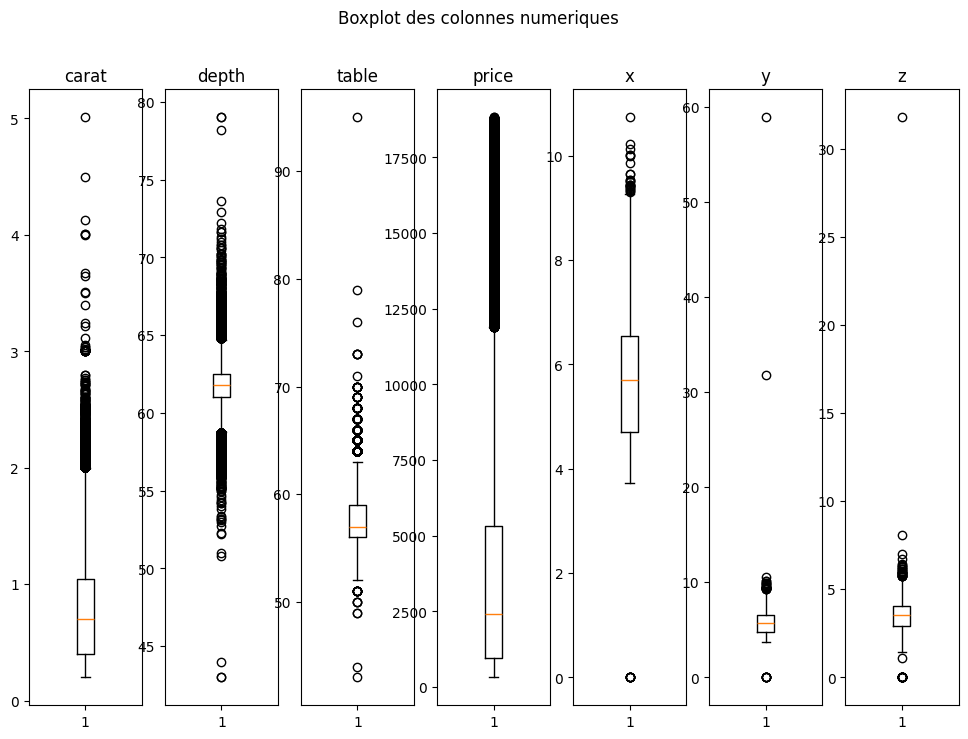

In [23]:
num_col=['carat','depth','table','price','x','y','z']
fig, ax = plt.subplots(1,7,figsize=(12,8))

for j in range(7):
    ax[j].boxplot(data[num_col[j]])
    ax[j].set_title(num_col[j])

fig.suptitle("Boxplot des colonnes numeriques")
plt.show()



# Ramenons les outlers

In [24]:
for i in num_col:

    Q3 = np.percentile(data[i],75)
    Q1 = np.percentile(data[i],25)
    IQR = Q3 - Q1
    Maxi = Q3 + 1.5*IQR
    Mini = Q1 - 1.5*IQR

#Ramenons les outliers a la distriution 

    data[i][data[i] > Maxi] = Maxi
    data[i][data[i] < Mini] = Mini

C:\Users\COMPUTER-STORE\AppData\Local\Temp\ipykernel_21756\4009229865.py:11: FutureWarning: ChainedAssignmentError: behaviour will change in pandas 3.0!
You are setting values through chained assignment. Currently this works in certain cases, but when using Copy-on-Write (which will become the default behaviour in pandas 3.0) this will never work to update the original DataFrame or Series, because the intermediate object on which we are setting values will behave as a copy.
A typical example is when you are setting values in a column of a DataFrame, like:

df["col"][row_indexer] = value

Use `df.loc[row_indexer, "col"] = values` instead, to perform the assignment in a single step and ensure this keeps updating the original `df`.

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy

  data[i][data[i] > Maxi] = Maxi
C:\Users\COMPUTER-STORE\AppData\Local\Temp\ipykernel_21756\4009229865.py:11: SettingWit

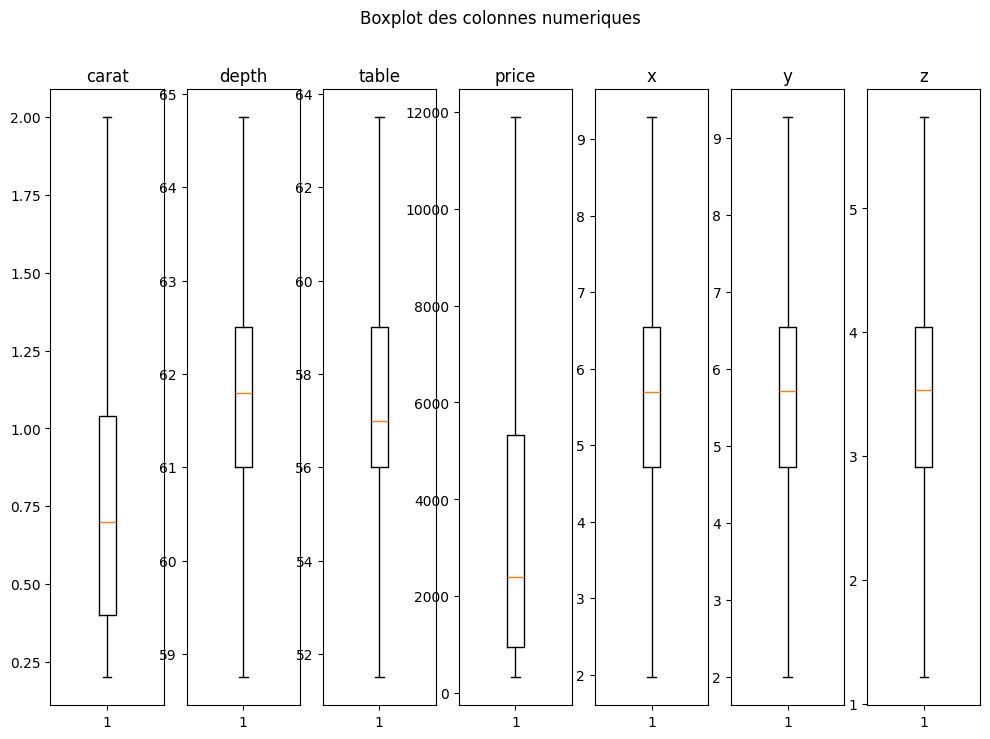

In [25]:
fig, ax = plt.subplots(1,7,figsize=(12,8))

for j in range(7):
    ax[j].boxplot(data[num_col[j]])
    ax[j].set_title(num_col[j])

fig.suptitle("Boxplot des colonnes numeriques")
plt.show()

# caracteristiques du dataset

In [26]:
# caracteristiques du dataset

data.describe().T # transpose

count         mean          std         min         25%  \
carat    53940.0     0.792558     0.457089    0.200000    0.400000   
cut      53940.0     2.553003     1.027708    0.000000    2.000000   
depth    53940.0    61.749156     1.270254   58.750000   61.000000   
table    53940.0    57.430070     2.166556   51.500000   56.000000   
price    53940.0  3732.145690  3436.769344  326.000000  950.000000   
x        53940.0     5.731285     1.119956    1.965000    4.710000   
y        53940.0     5.733311     1.111950    1.990000    4.720000   
z        53940.0     3.538500     0.692494    1.215000    2.910000   
Color    53940.0     0.160397     0.041970    0.052058    0.125603   
Clarity  53940.0     0.177013     0.064957    0.013737    0.151483   

                 50%          75%           max  
carat       0.700000     1.040000      2.000000  
cut         2.000000     3.000000      4.000000  
depth      61.800000    62.500000     64.750000  
table      57.000000    59.000000     63.500000  
price    2401.000000  5324.250000  11885.625000  
x           5.700000     6.540000      9.285000  
y           5.710000     6.540000      9.270000  
z           3.530000     4.040000      5.735000  
Color       0.176900     0.181628      0.209344  
Clarity     0.170449     0.227253      0.242214

In [27]:
data.head(5)

carat  cut  depth  table  price     x     y     z     Color   Clarity
0   0.23    2  61.50   55.0  326.0  3.95  3.98  2.43  0.181628  0.170449
1   0.21    3  59.80   61.0  326.0  3.89  3.84  2.31  0.181628  0.242214
2   0.23    1  58.75   63.5  327.0  4.05  4.07  2.31  0.181628  0.151483
3   0.29    3  62.40   58.0  334.0  4.20  4.23  2.63  0.100519  0.227253
4   0.31    1  63.30   58.0  335.0  4.34  4.35  2.75  0.052058  0.170449

In [28]:
data['table'] = data['table'].astype('int')
data['price'] = data['price'].astype('int')

In [29]:
data.dtypes

carat      float64
cut          int64
depth      float64
table        int64
price        int64
x          float64
y          float64
z          float64
Color      float64
Clarity    float64
dtype: object

## Pairplot

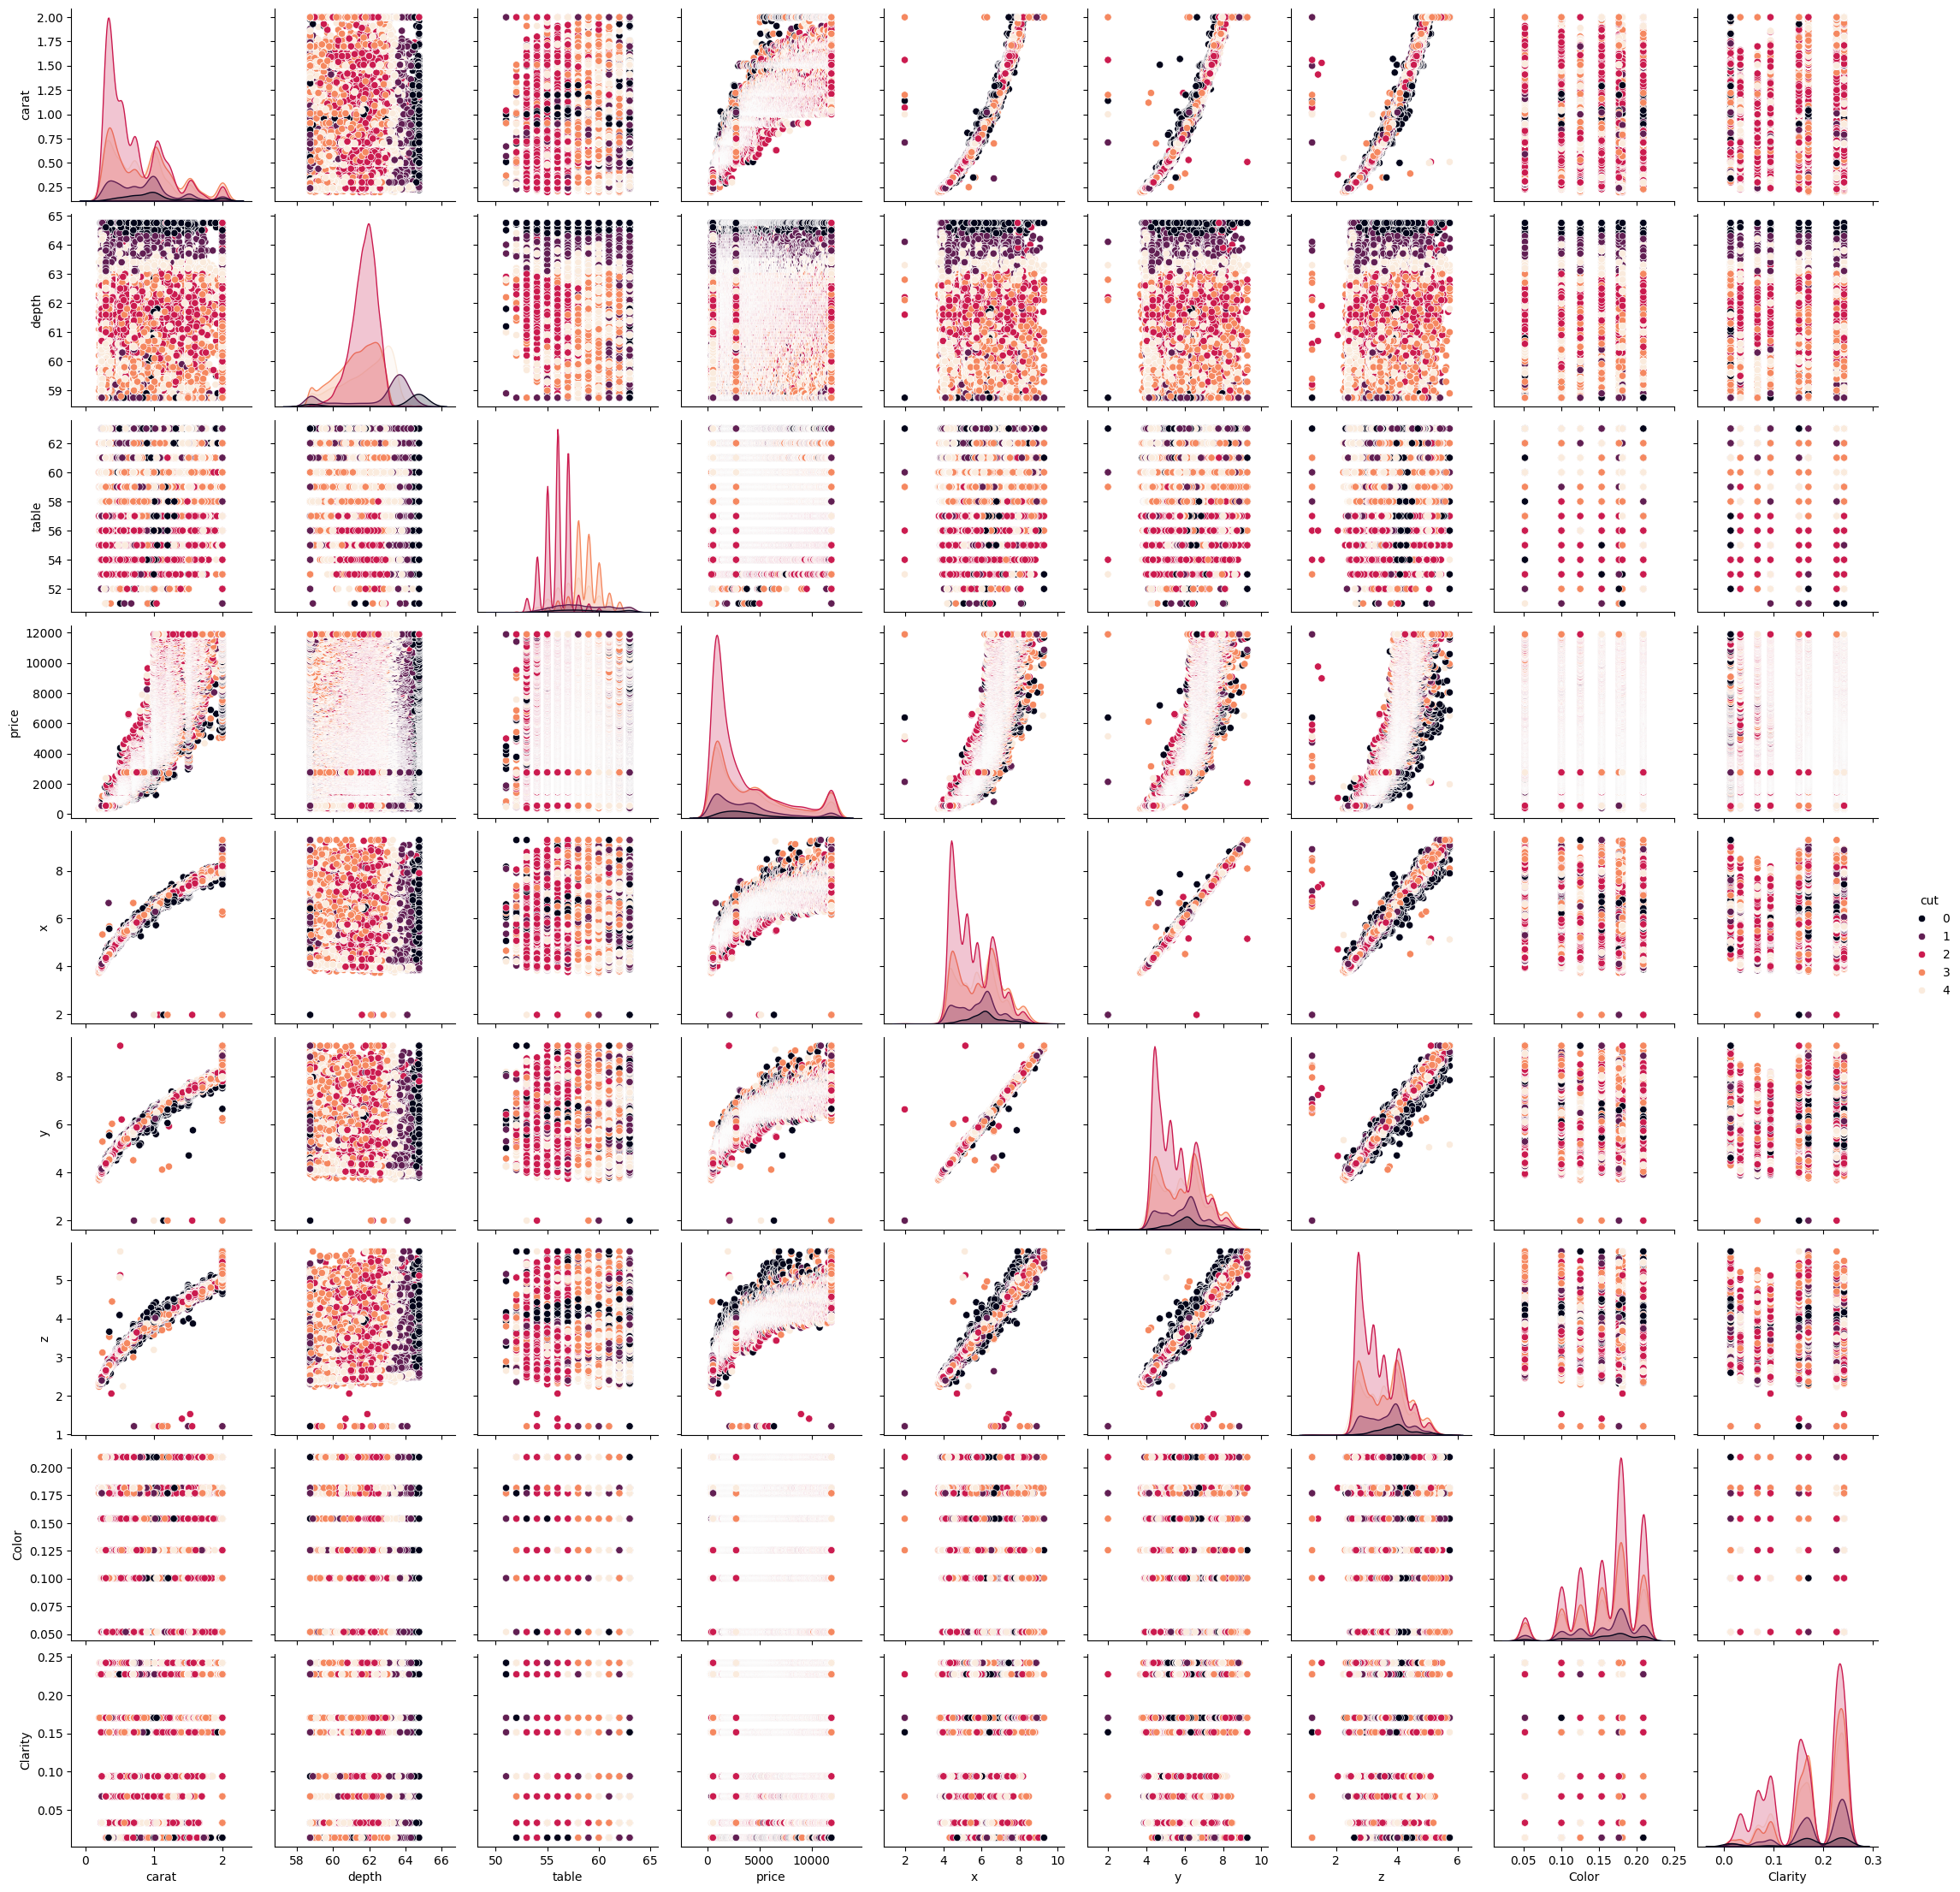

In [30]:
#Pair plot en fonction du label

sns.pairplot(data=data, hue='cut', palette='rocket')

# Distribution

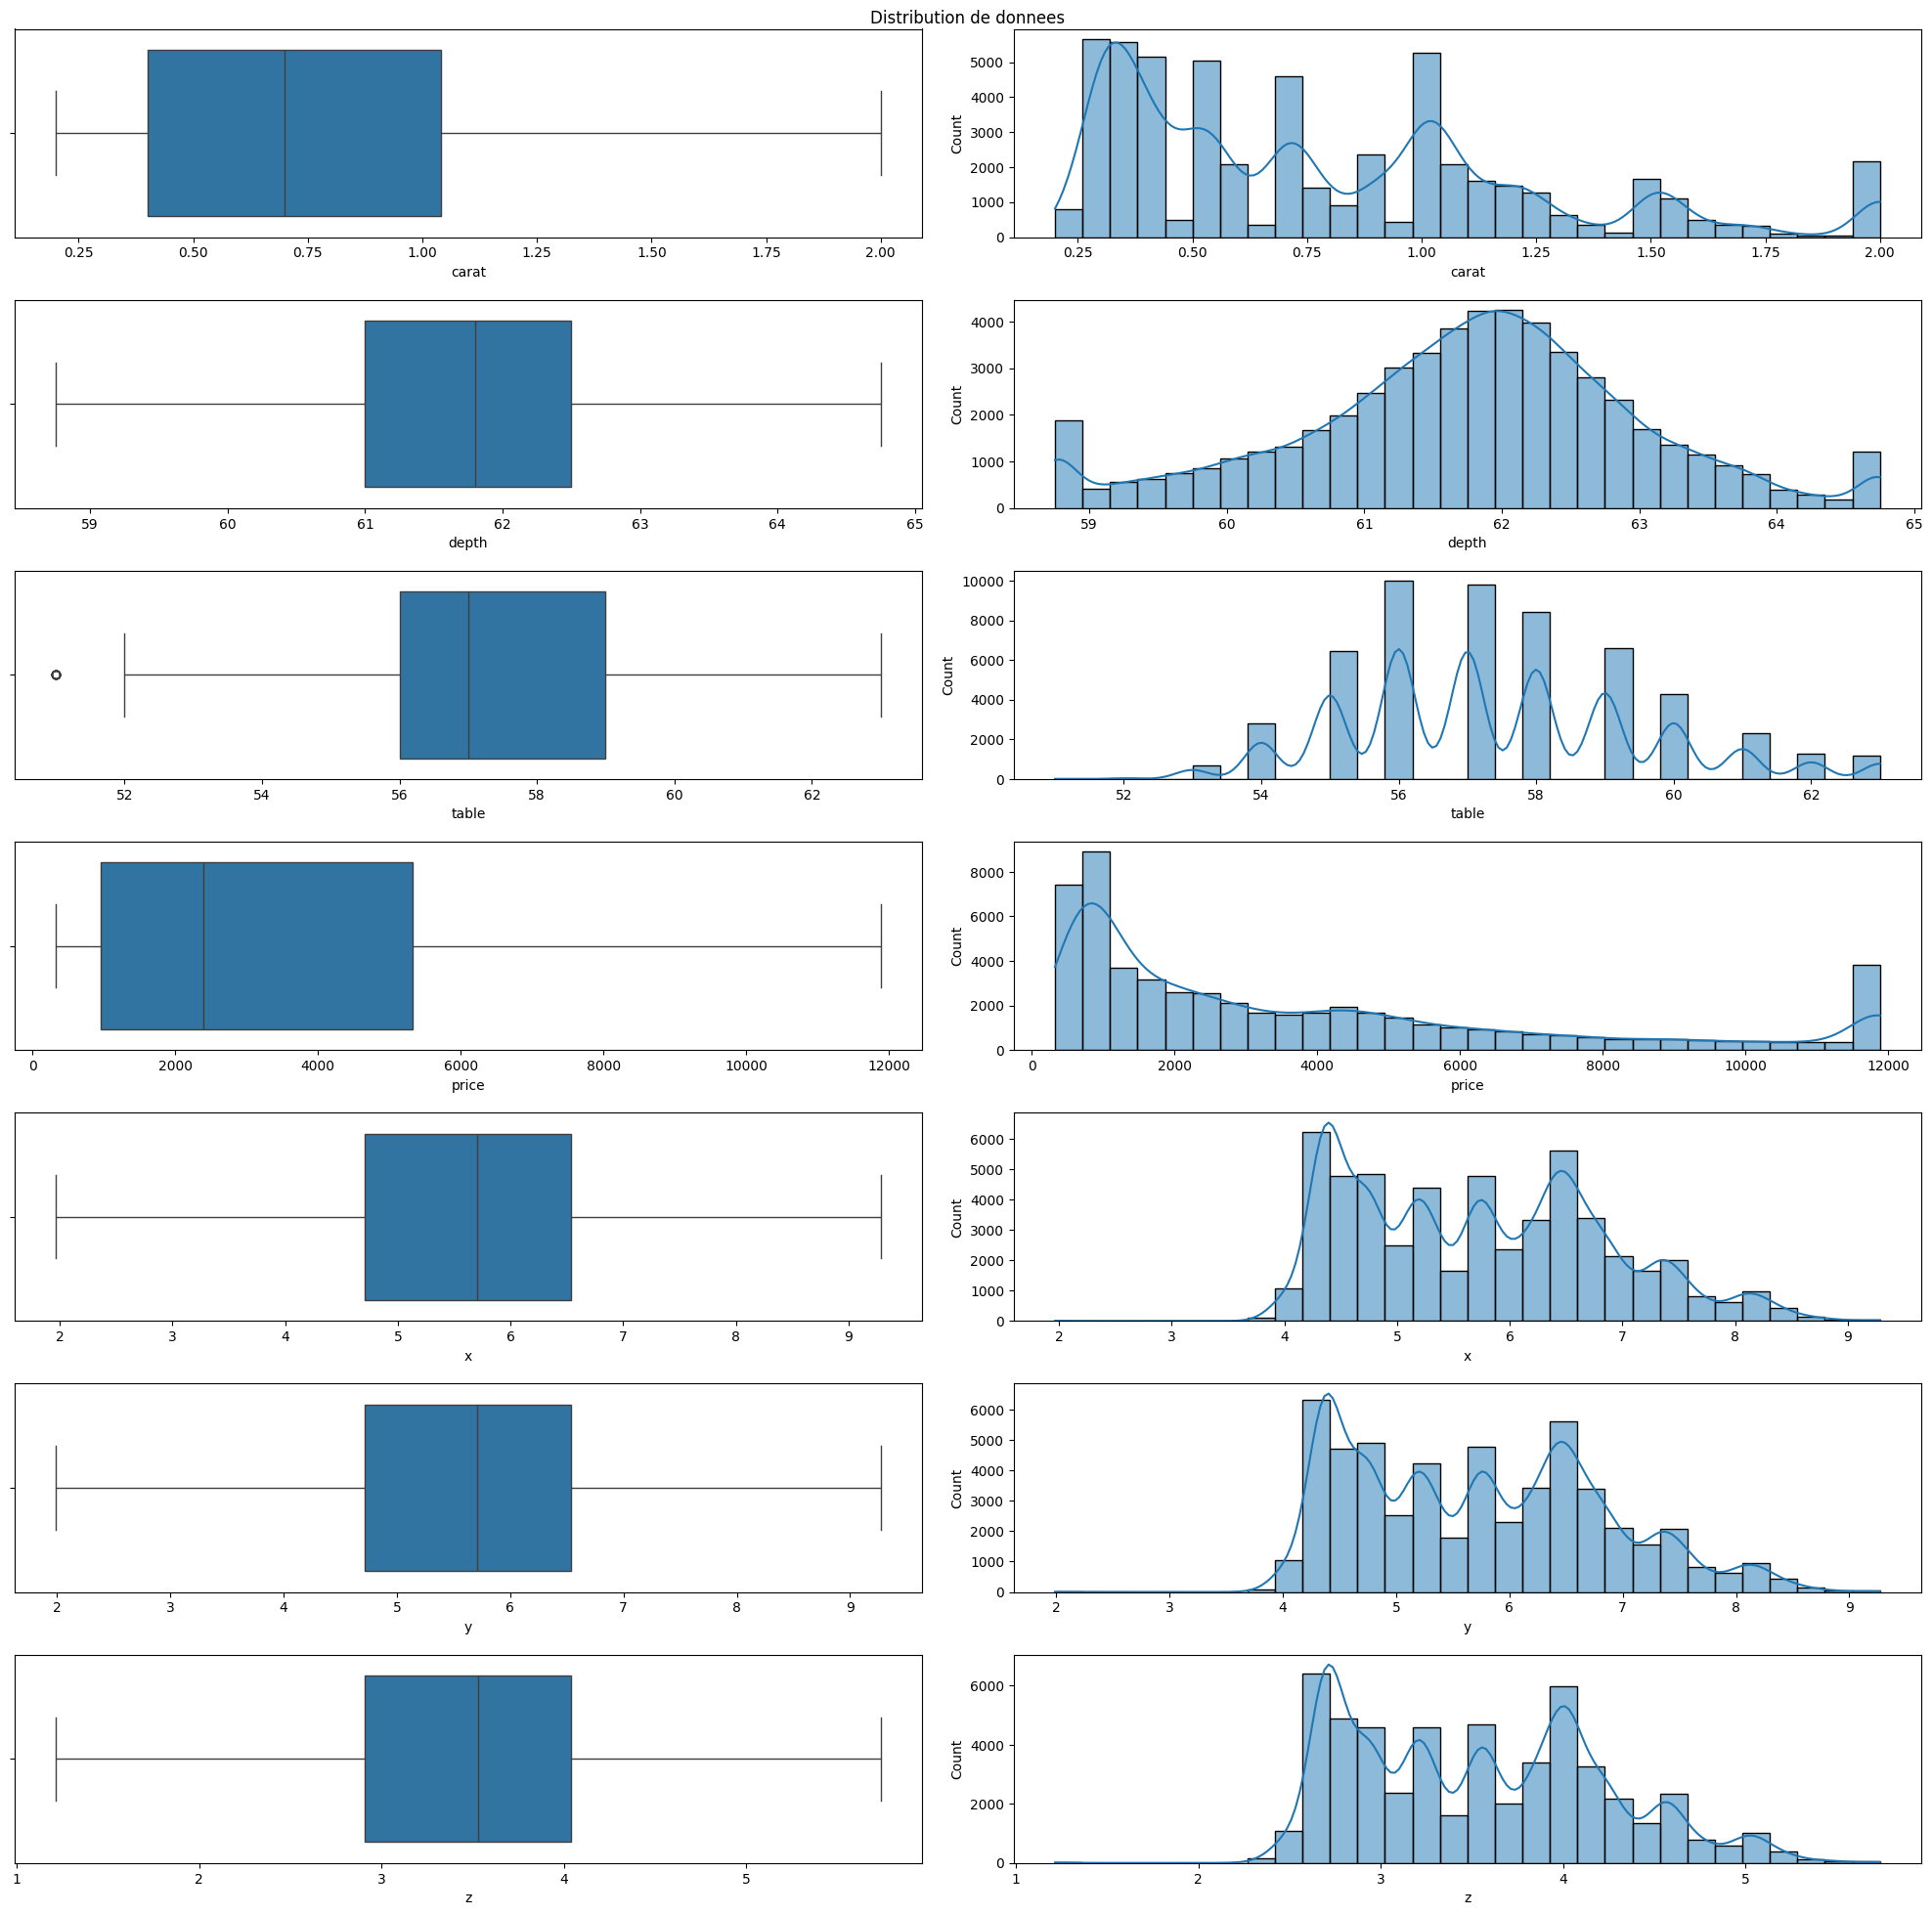

In [31]:
fig, ax = plt.subplots(ncols=2,nrows=len(num_col),figsize=(20,20))
for i in enumerate(num_col):
    sns.boxplot(x=data[i[1]],ax=ax[i[0]][0])
    sns.histplot(x=data[i[1]],kde=True,bins=30,ax=ax[i[0]][1])

fig.suptitle("Distribution de donnees")
sns.set_context(font_scale=5)
plt.tight_layout(pad=1.5)
plt.show()

# Distrribution du target

<Axes: xlabel='cut', ylabel='count'>

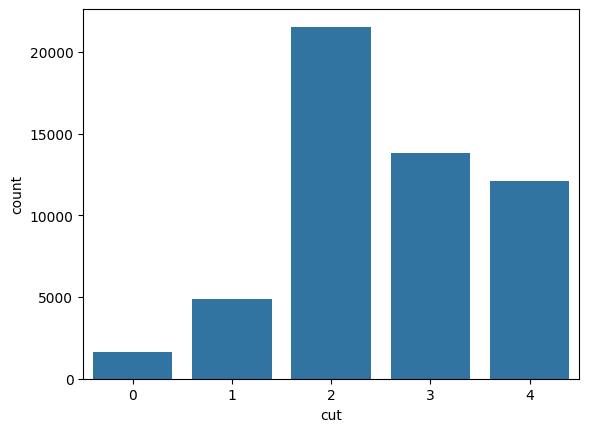

In [32]:
sns.countplot(x = 'cut', data = data)

# Division du dataset en features et target

In [33]:
#Separation X et Y et transformation en numpy array

X = data.drop(['cut'],axis=1).values
y = data['cut'].values

# Split

In [34]:

X_train, X_test, y_train, y_test = train_test_split(X, y,  test_size = 0.20, random_state = 44)
X_train.shape, X_test.shape, y_train.shape, y_test.shape

((43152, 9), (10788, 9), (43152,), (10788,))

## Standardisation

In [35]:
sc = StandardScaler()
X_train_sc = sc.fit_transform(X_train)
X_test_sc = sc.transform(X_test)

## Transformation nos donnees en tensors

In [36]:
#Transformation en tensors

X_train_t = torch.tensor(X_train_sc, dtype=torch.float32)
X_test_t = torch.tensor(X_test_sc, dtype=torch.float32)
y_train_t = torch.tensor(y_train, dtype=torch.float32)
y_test_t = torch.tensor(y_test, dtype=torch.float32)

In [37]:
X_train_t.shape

torch.Size([43152, 9])

### Creation des couches

In [38]:
class diamonds_model(nn.Module):
    def __init__(self):
        super().__init__()

        self.layer_1 = nn.Linear(in_features=X_train_t.shape[1], out_features=15)
        self.layer_2 = nn.Linear(in_features=15, out_features=12)
        self.layer_3 = nn.Linear(in_features=12, out_features=8)
        self.layer_4 = nn.Linear(in_features=8, out_features=5)
        self.relu = nn.ReLU()
    def forward(self, x):
        x = self.relu(self.layer_1(x))
        x = self.relu(self.layer_2(x))
        x = self.relu(self.layer_3(x))
        x = self.layer_4(x)
        return x
    
model = diamonds_model()
model

diamonds_model(
  (layer_1): Linear(in_features=9, out_features=15, bias=True)
  (layer_2): Linear(in_features=15, out_features=12, bias=True)
  (layer_3): Linear(in_features=12, out_features=8, bias=True)
  (layer_4): Linear(in_features=8, out_features=5, bias=True)
  (relu): ReLU()
)

In [39]:
y_train_t = y_train_t.long()
y_test_t = y_test_t.long() 

# Entrainement

In [40]:
# Supposons que vous avez X_train_t, y_train_t, X_test_t, y_test_t, et votre modèle

# Fonction d'exactitude modifiée pour la classification multiclasse
def accuracy_fn(y_true, y_pred):
    correct = torch.eq(y_true, y_pred).sum().item()
    acc = (correct / len(y_pred)) * 100
    return acc

# Fonction de perte (CrossEntropyLoss pour la classification multiclasse)
loss_fn = nn.CrossEntropyLoss()

# Optimiseur
optimizer = optim.Adam(model.parameters(), lr=0.001)  # Assurez-vous que votre modèle est défini

epoch_count = []
train_acc_list = []
test_acc_list = []
train_loss_list = []
test_loss_list = []

torch.manual_seed(42)
epochs = 10000
for epoch in range(epochs):
    
    model.train()
    y_logits = model(X_train_t)  # Pas de squeeze ici, sortie de taille (batch_size, 5)
    y_pred = torch.argmax(y_logits, dim=1)  # Récupère l'indice de la classe avec la probabilité maximale
    
    # Calcul de la perte/exactitude
    loss = loss_fn(y_logits, y_train_t)
    acc = accuracy_fn(y_train_t, y_pred)
    
    # Optimizer zero grad
    optimizer.zero_grad()
    
    # loss backward
    loss.backward()
    
    # Optimizer step
    optimizer.step()
    
    # Test
    model.eval()
    with torch.inference_mode():
        # forward pass
        test_logits = model(X_test_t)
        test_pred = torch.argmax(test_logits, dim=1)
        
        # calculate the test_loss/accurary
        test_loss = loss_fn(test_logits, y_test_t)
        test_acc = accuracy_fn(y_test_t, test_pred)
        
        # print out what's happening every 10 epoch's
        if epoch % 100 == 0:
            epoch_count.append(epoch)
            train_acc_list.append(acc)
            test_acc_list.append(test_acc)
            train_loss_list.append(loss)
            test_loss_list.append(test_loss)
            
            print(f'Epoch:{epoch}, | Loss:{loss:.5f} | Acc={acc:.2f}% | Test Loss:{test_loss:.5f} | Test Acc:{test_acc:.2f}%')

Epoch:0, | Loss:1.60152 | Acc=25.15% | Test Loss:1.59806 | Test Acc:25.85%
Epoch:100, | Loss:1.26138 | Acc=49.83% | Test Loss:1.25950 | Test Acc:49.73%
Epoch:200, | Loss:1.05308 | Acc=60.80% | Test Loss:1.04783 | Test Acc:60.98%
Epoch:300, | Loss:0.95458 | Acc=63.03% | Test Loss:0.95047 | Test Acc:63.41%
Epoch:400, | Loss:0.88757 | Acc=64.52% | Test Loss:0.88475 | Test Acc:64.83%
Epoch:500, | Loss:0.82811 | Acc=68.49% | Test Loss:0.82484 | Test Acc:68.39%
Epoch:600, | Loss:0.77881 | Acc=68.81% | Test Loss:0.78015 | Test Acc:68.98%
Epoch:700, | Loss:0.74134 | Acc=71.28% | Test Loss:0.74691 | Test Acc:71.03%
Epoch:800, | Loss:0.70214 | Acc=72.70% | Test Loss:0.70806 | Test Acc:72.64%
Epoch:900, | Loss:0.63493 | Acc=75.57% | Test Loss:0.64031 | Test Acc:75.38%
Epoch:1000, | Loss:0.60649 | Acc=76.26% | Test Loss:0.61282 | Test Acc:76.04%
Epoch:1100, | Loss:0.59857 | Acc=76.45% | Test Loss:0.60585 | Test Acc:76.22%
Epoch:1200, | Loss:0.59394 | Acc=76.59% | Test Loss:0.60230 | Test Acc:76.40

# Vsualisation

C:\Users\COMPUTER-STORE\AppData\Local\Temp\ipykernel_21756\3074989690.py:2: DeprecationWarning: __array__ implementation doesn't accept a copy keyword, so passing copy=False failed. __array__ must implement 'dtype' and 'copy' keyword arguments. To learn more, see the migration guide https://numpy.org/devdocs/numpy_2_0_migration_guide.html#adapting-to-changes-in-the-copy-keyword
  train_acc_list = np.array(torch.tensor(train_acc_list))
C:\Users\COMPUTER-STORE\AppData\Local\Temp\ipykernel_21756\3074989690.py:3: DeprecationWarning: __array__ implementation doesn't accept a copy keyword, so passing copy=False failed. __array__ must implement 'dtype' and 'copy' keyword arguments. To learn more, see the migration guide https://numpy.org/devdocs/numpy_2_0_migration_guide.html#adapting-to-changes-in-the-copy-keyword
  test_acc_list = np.array(torch.tensor(test_acc_list))


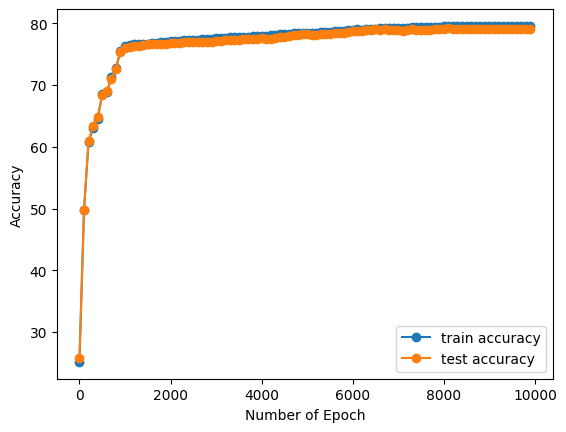

In [41]:
# revert to numpy array
train_acc_list = np.array(torch.tensor(train_acc_list))
test_acc_list = np.array(torch.tensor(test_acc_list))

plt.plot(epoch_count, train_acc_list , label = 'train accuracy', marker='o')
plt.plot(epoch_count, test_acc_list, label = 'test accuracy', marker='o')

plt.xlabel('Number of Epoch')
plt.ylabel('Accuracy')
plt.legend()

C:\Users\COMPUTER-STORE\AppData\Local\Temp\ipykernel_21756\3875848580.py:2: DeprecationWarning: __array__ implementation doesn't accept a copy keyword, so passing copy=False failed. __array__ must implement 'dtype' and 'copy' keyword arguments. To learn more, see the migration guide https://numpy.org/devdocs/numpy_2_0_migration_guide.html#adapting-to-changes-in-the-copy-keyword
  train_loss_list = np.array(torch.tensor(train_loss_list))
C:\Users\COMPUTER-STORE\AppData\Local\Temp\ipykernel_21756\3875848580.py:3: DeprecationWarning: __array__ implementation doesn't accept a copy keyword, so passing copy=False failed. __array__ must implement 'dtype' and 'copy' keyword arguments. To learn more, see the migration guide https://numpy.org/devdocs/numpy_2_0_migration_guide.html#adapting-to-changes-in-the-copy-keyword
  test_loss_list = np.array(torch.tensor(test_loss_list))


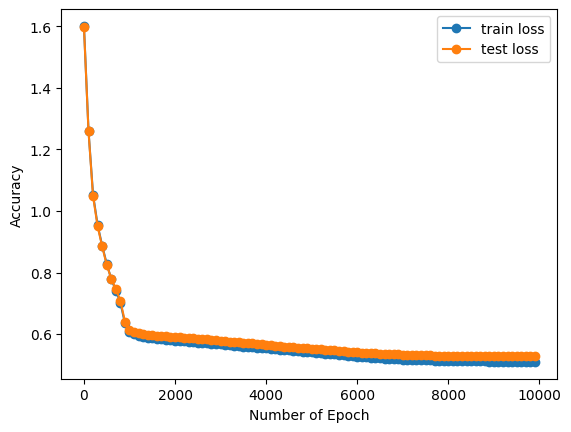

In [42]:
# revert to numpy array
train_loss_list = np.array(torch.tensor(train_loss_list))
test_loss_list = np.array(torch.tensor(test_loss_list))

plt.plot(epoch_count, train_loss_list , label = 'train loss', marker='o')
plt.plot(epoch_count, test_loss_list, label = 'test loss', marker='o')

plt.xlabel('Number of Epoch')
plt.ylabel('Accuracy')
plt.legend()

# Matrice de confusion

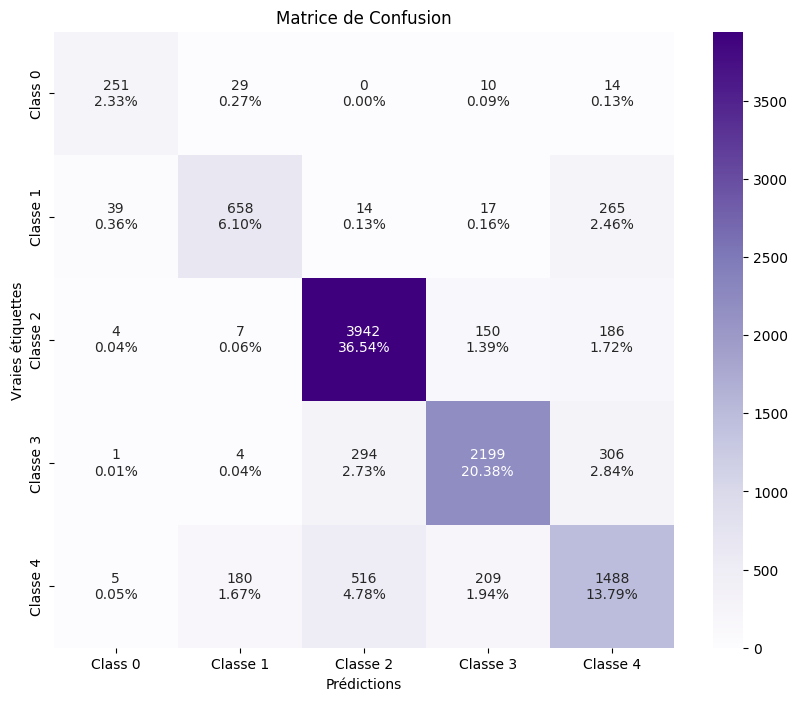

In [43]:
# Générer la matrice de confusion

from sklearn.metrics import confusion_matrix
model_matrix = confusion_matrix(y_test, test_pred)

# Noms des classes (ajustez-les si nécessaire)
class_names = ['Class 0', 'Classe 1', 'Classe 2', 'Classe 3', 'Classe 4'] 

# Générer les étiquettes pour la matrice de confusion
group_counts = ['{0:0.0f}'.format(value) for value in model_matrix.flatten()]
group_percentages = ['{0:.2%}'.format(value) for value in model_matrix.flatten()/np.sum(model_matrix)]
labels = [f'{v1}\n{v2}' for v1, v2 in zip(group_counts, group_percentages)] #Remove group_names for a cleaner look.
labels = np.asarray(labels).reshape(5, 5) #Reshape labels to a 5x5 matrix.

# Créer la figure et le heatmap
fig, ax = plt.subplots(figsize=(10, 8)) 

sns.heatmap(model_matrix, annot=labels, fmt='', cmap='Purples', xticklabels=class_names, yticklabels=class_names) #Add xticklabels and yticklabels.

plt.xlabel('Prédictions')
plt.ylabel('Vraies étiquettes')
plt.title('Matrice de Confusion')

plt.show()

In [44]:
data.columns

Index(['carat', 'cut', 'depth', 'table', 'price', 'x', 'y', 'z', 'Color',
       'Clarity'],
      dtype='object')

In [45]:
liste = ['carat', 'cut', 'depth', 'table', 'price', 'x', 'y', 'z', 'Color','Clarity']
formatted_output = ""
for i, element in enumerate(liste):
    formatted_output += element
    if i != len(liste) - 1:
        formatted_output += ", "
print(formatted_output)

carat, cut, depth, table, price, x, y, z, Color, Clarity


# Prediction


In [46]:
def Prediction_sample(model, carat, depth, table, price, x, y, z, Color, Clarity):
    
    sub = np.array([[carat, depth, table, price, x, y, z, Color, Clarity]])
    sub = torch.from_numpy(sub).type(torch.float)

    model.eval()
    with torch.inference_mode():
        # Forward pass
        sub_logits = model(sub)  # No squeeze, model outputs logits for 5 classes
        sub_pred = torch.argmax(sub_logits, dim=1)  # Get the class with the highest probability

    return sub_pred.item()  # Return the predicted class as an integer

In [47]:
data.head(5)

carat  cut  depth  table  price     x     y     z     Color   Clarity
0   0.23    2  61.50     55    326  3.95  3.98  2.43  0.181628  0.170449
1   0.21    3  59.80     61    326  3.89  3.84  2.31  0.181628  0.242214
2   0.23    1  58.75     63    327  4.05  4.07  2.31  0.181628  0.151483
3   0.29    3  62.40     58    334  4.20  4.23  2.63  0.100519  0.227253
4   0.31    1  63.30     58    335  4.34  4.35  2.75  0.052058  0.170449

In [48]:
predicted_class = Prediction_sample(model, 1.5, 62.0, 58, 7000, 7.5, 7.6, 4.7, 2, 0.170449) #Replace with your values.
print(f"Classe prédite : {predicted_class}")

Classe prédite : 3


## Sauvegarde du modele

In [ ]:
torch.save(model, "modeleANN.pth")